# Add Matplotlib inline magic command & import dependencies

In [78]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create variables to load files

In [79]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the files and store them in pandas DataFrame

In [80]:
# Read city data and store into DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [81]:
# Read ride data and store into DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Merge 2 DataFrames

In [82]:
# Combine 2 data into a single sheet
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
# Display the DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


# Technical Analysis Deliverable 1: A Summary DataFrame

## Total Rides

In [83]:
# Get the sum of the rides for each city type.
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

## Total Drivers

In [84]:
# Get the sum of the drivers for each city type.
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

## Total Fares

In [85]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

## Average Fare per Ride

In [86]:
average_fare_per_ride_by_type = sum_fares_by_type / sum_rides_by_type
average_fare_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

## Average Fare per Driver

In [87]:
average_fare_per_driver_by_type = sum_fares_by_type / sum_drivers_by_type
average_fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [88]:
# Adding a list of values with keys to create a new DataFrame.
summary_df = pd.DataFrame({
             "Total Rides": sum_rides_by_type,
             "Total Drivers": sum_drivers_by_type,
             "Total Fares": sum_fares_by_type,
             "Average Fare Per Ride": average_fare_per_ride_by_type,
             "Average Fare Per Driver": average_fare_per_driver_by_type})
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare Per Ride"] = summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
summary_df["Average Fare Per Driver"] = summary_df["Average Fare Per Driver"].map("${:,.2f}".format)
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

## Rename columns

In [89]:
pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True )
pyber_data_df.head(10)

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Create new DataFrame for City Type and Fare

## Select columns Date, City Type, Fare

In [90]:
selected_columns = pyber_data_df[["Date", "City Type", "Fare"]]
date_cityType_fare = selected_columns.copy()
date_cityType_fare = date_cityType_fare.set_index(["Date"])
date_cityType_fare_df = pd.DataFrame(date_cityType_fare)
date_cityType_fare_df.head(10)

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


In [91]:
cityType_fare = date_cityType_fare_df["City Type"]
cityType_fare.head()

Date
2019-01-14 10:14:22    Urban
2019-03-04 18:24:09    Urban
2019-02-24 04:29:00    Urban
2019-02-10 23:22:03    Urban
2019-03-06 04:28:35    Urban
Name: City Type, dtype: object

## Set the index to the datetime data type.

In [92]:
date_cityType_fare_df.index = pd.DatetimeIndex(date_cityType_fare_df.index)

In [93]:
date_cityType_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


## Calculate the sum() of fares by the type of city and date using groupby() to create a Series.

## Sum of fares by date

In [94]:
sum_of_fares_by_date = date_cityType_fare_df.groupby(["Date"]).sum()["Fare"]
sum_of_fares_by_date_df = pd.DataFrame(sum_of_fares_by_date)
sum_of_fares_by_date_df.head()

,Fare
Date,
2019-01-01 00:08:16,37.91
2019-01-01 00:46:46,47.74
2019-01-01 02:07:24,24.07
2019-01-01 03:46:50,7.57
2019-01-01 05:23:21,10.75


## Sum of fares by city type

In [95]:
sum_of_fares_by_cityType = date_cityType_fare_df.groupby(["City Type"]).sum()["Fare"]
sum_of_fares_by_cityType.head()

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

## Create new DataFrame for sums of fares by city type and date

In [96]:
table = pd.pivot_table(date_cityType_fare_df, values = "Fare", index = ["Date"], columns = ["City Type"])
table.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [97]:
table_df = pd.DataFrame(table)
table_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [98]:
table_df.index = pd.DatetimeIndex(table_df.index)

In [99]:
table_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


## Group table by week

In [100]:
table_df = table_df.groupby(pd.Grouper(freq = "W")).sum()
table_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [101]:
table_final = pd.DataFrame(table_df)
table_final

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [102]:
table_final_df = table_final.loc["2019-01-01":"2019-04-28"]
table_final_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Set the axises

In [103]:
x_axis = table_final_df.index
x_axis

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [104]:
rural_y_axis = table_final_df["Rural"]
rural_y_axis

Date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
2019-02-10    115.80
2019-02-17     95.82
2019-02-24    419.06
2019-03-03    175.14
2019-03-10    303.94
2019-03-17    163.39
2019-03-24    189.76
2019-03-31    199.42
2019-04-07    501.24
2019-04-14    269.79
2019-04-21    214.14
2019-04-28    191.85
Freq: W-SUN, Name: Rural, dtype: float64

In [105]:
suburban_y_axis = table_final_df["Suburban"]
suburban_y_axis

Date
2019-01-06     721.60
2019-01-13    1105.13
2019-01-20    1218.20
2019-01-27    1203.28
2019-02-03    1042.79
2019-02-10     974.34
2019-02-17    1045.50
2019-02-24    1412.74
2019-03-03     858.46
2019-03-10     925.27
2019-03-17     906.20
2019-03-24    1122.20
2019-03-31    1045.06
2019-04-07    1010.73
2019-04-14     784.82
2019-04-21    1149.27
2019-04-28    1357.75
Freq: W-SUN, Name: Suburban, dtype: float64

In [106]:
urban_y_axis = table_final_df["Urban"]
urban_y_axis

Date
2019-01-06    1661.68
2019-01-13    2050.43
2019-01-20    1939.02
2019-01-27    2129.51
2019-02-03    2086.94
2019-02-10    2162.64
2019-02-17    2235.07
2019-02-24    2466.29
2019-03-03    2218.20
2019-03-10    2470.93
2019-03-17    2044.42
2019-03-24    2368.37
2019-03-31    1942.77
2019-04-07    2356.70
2019-04-14    2390.72
2019-04-21    2303.80
2019-04-28    2238.29
Freq: W-SUN, Name: Urban, dtype: float64

# Create the chart

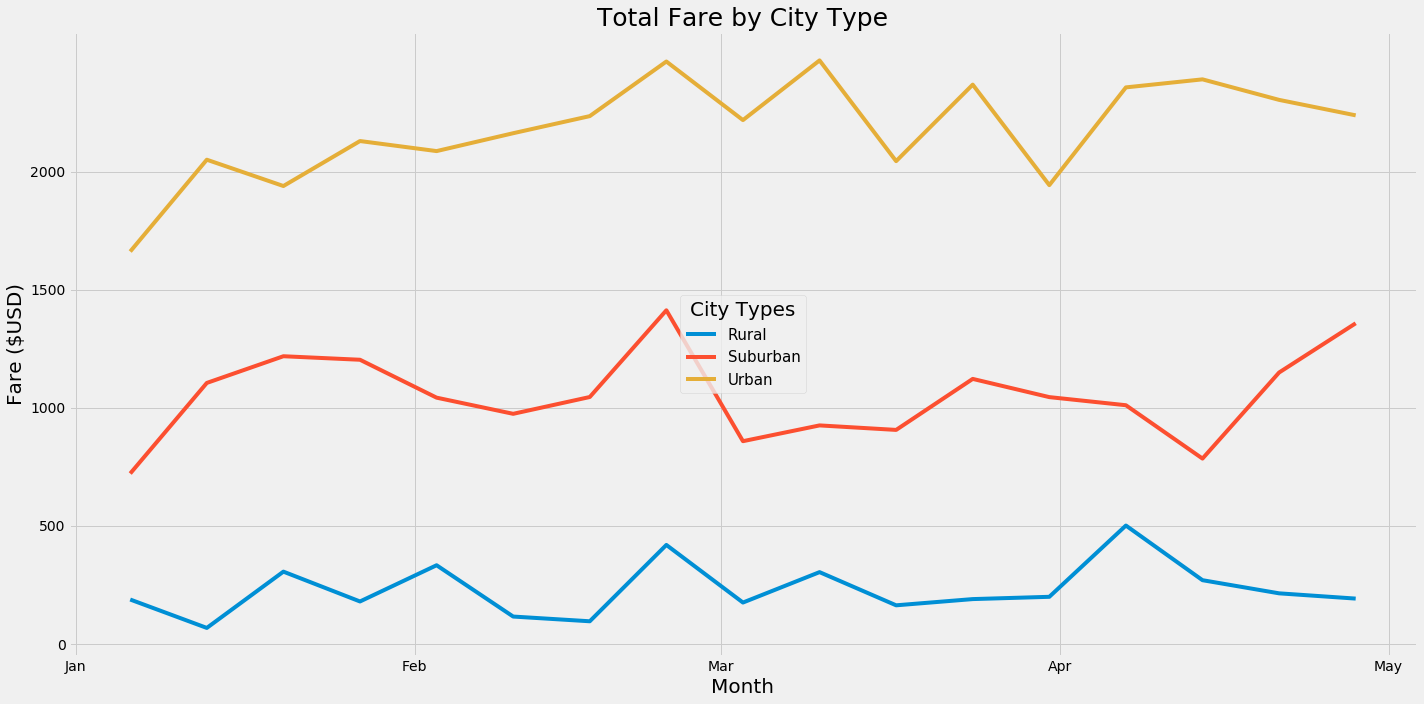

In [121]:
import matplotlib.dates as mdates
months = mdates.MonthLocator()
#years_fmt = mdates.DateFormatter()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x_axis, rural_y_axis, label = "Rural" )
ax.plot(x_axis, suburban_y_axis, label = "Suburban" )
ax.plot(x_axis, urban_y_axis, label = "Urban" )
ax.set_title('Total Fare by City Type',fontsize=25)
ax.set_ylabel('Fare ($USD)',fontsize=20)
ax.set_xlabel("Month",fontsize=20)
ax.set_yticks(np.arange(0, 2500, step=500.0))
#ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
lgnd = plt.legend(fontsize="15", mode="Expanded",
         scatterpoints=1, loc="center", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(20)
plt.tight_layout()
ax.grid(True)
plt.savefig("analysis/FigChallenge.png")
plt.show()